In [29]:
from bs4 import BeautifulSoup
import urllib.request
import requests
import pandas as pd

In [ ]:
url = "https://www.firstpost.com/tag/ipl-2020"
headers = {'User-Agent': 'Mozilla/5.0'}
page = requests.get(url, headers=headers) # conntect to website
soup = BeautifulSoup(page.text, 'html.parser')

In [22]:
links=[]
for i in soup.findAll('h3',attrs={'class':'main-title'}):
    for j in i.findAll('a'):
        links.append(j.get('href'))

In [36]:
paras = []
for i in range(len(links)):    
    single_para=[]
    url = links[i]
    headers = {'User-Agent': 'Mozilla/5.0'}
    page = requests.get(url, headers=headers) # conntect to website
    soup = BeautifulSoup(page.text, 'html.parser')
    
    for para in soup.findAll('p'):
        single_para.append(para.text)
    paras.append(single_para)

In [49]:
ipl_df = pd.DataFrame(pd.Series(paras),columns=['IPL_Articles'])
# ipl_df.to_csv('ipl_df.csv')

## TEXT SUMMARIZATION

## Text summarization can broadly be divided into two categories — Extractive Summarization and Abstractive Summarization.

### Extractive Summarization: 
These methods rely on extracting several parts, such as phrases and sentences, from a piece of text and stack them together to create a summary. Therefore, identifying the right sentences for summarization is of utmost importance in an extractive method.

### Abstractive Summarization:
These methods use advanced NLP techniques to generate an entirely new summary. Some parts of this summary may not even appear in the original text.

## Understanding the PageRank Algorithm
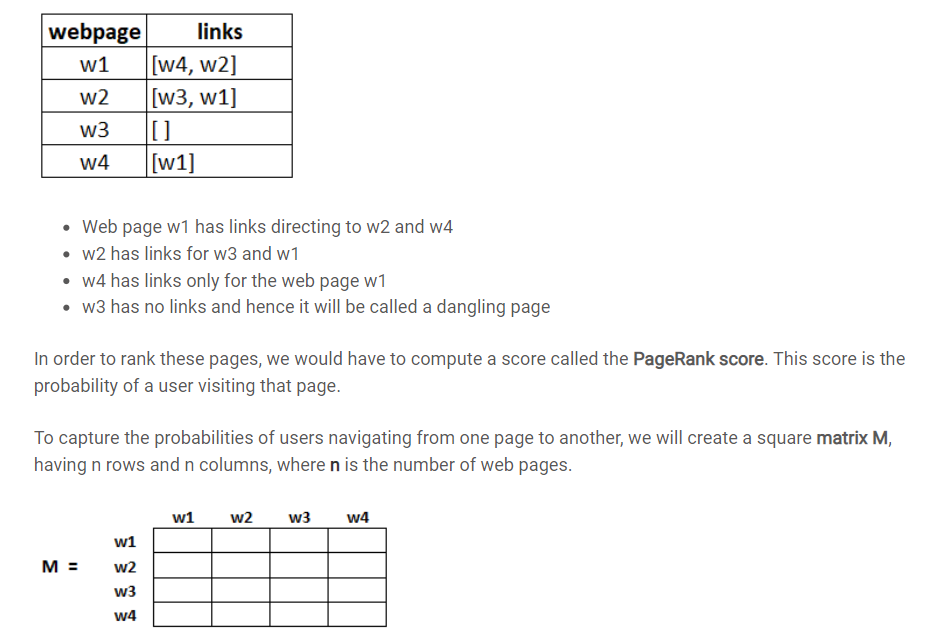
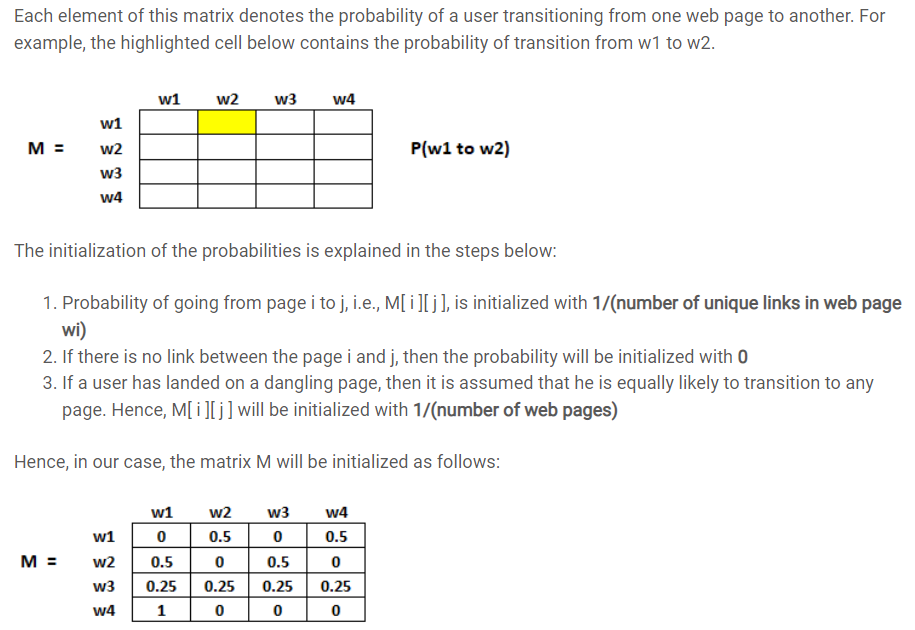


## Understanding Text-Ranking Algorithm
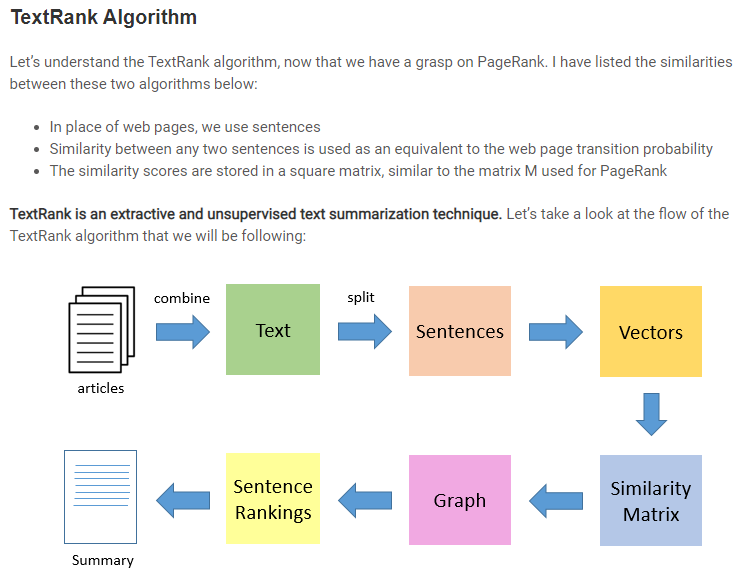
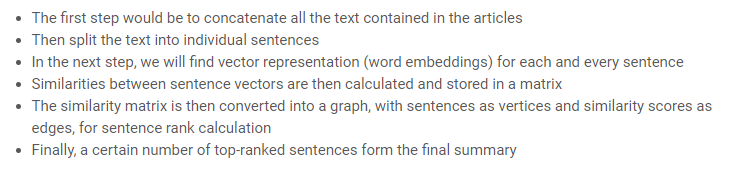


In [50]:
import numpy as np
import pandas as pd
import nltk
# nltk.download('punkt') # one time execution
import re

In [51]:
df = pd.read_csv("ipl_df.csv")

In [52]:
df.head()

,Unnamed: 0,IPL_Articles
0,0,"['Following a five-match losing streak, Kings ..."
1,1,['Mumbai Indians take on Kolkata Knight Riders...
2,2,['Abu Dhabi: An explosive batting line-up and ...
3,3,"[""Sharjah: Royal Challengers Bangalore skipper..."
4,4,"[""Sharjah: KL Rahul played a captain's knock a..."


In [54]:
df['IPL_Articles'][0]

'[\'Following a five-match losing streak, Kings XI Punjab (KXIP) finally managed to cross the finish line on Thursday (15 October) in Sharjah against Royal Challengers Bangalore to keep their campaign alive in IPL 2020. It was a game filled with a lot of drama and contrasting fortunes. Both teams made a lot of tactical blunders throughout the 40 overs, so much so that towards the climax, it seemed both were trying their best to lose. But in the end, Punjab had the last laugh by chasing down 172 on the final ball of the match.\', \'Here are some of the major talking points coming out from this closely fought fixture.\', "Spinners dictate terms\\n\\nWe witnessed quite a few spin-duels in this game. On that tired Sharjah pitch, Punjab included two leggies – Ravi Bishnoi and M Ashwin – in their XI, primarily to counter the AB de Villiers threat. Furthermore, against the RCB left-handers, KL Rahul\'s surprise move of using the part-time off-spin of Glenn Maxwell (4 overs for 28 runs) worked

### Split Text into Sentences

In [55]:
from nltk.tokenize import sent_tokenize
sentences = []
for s in df['IPL_Articles']:
    sentences.append(sent_tokenize(s))

sentences[:5]

[["['Following a five-match losing streak, Kings XI Punjab (KXIP) finally managed to cross the finish line on Thursday (15 October) in Sharjah against Royal Challengers Bangalore to keep their campaign alive in IPL 2020.",
  'It was a game filled with a lot of drama and contrasting fortunes.',
  'Both teams made a lot of tactical blunders throughout the 40 overs, so much so that towards the climax, it seemed both were trying their best to lose.',
  'But in the end, Punjab had the last laugh by chasing down 172 on the final ball of the match.',
  "', 'Here are some of the major talking points coming out from this closely fought fixture.",
  '\', "Spinners dictate terms\\n\\nWe witnessed quite a few spin-duels in this game.',
  'On that tired Sharjah pitch, Punjab included two leggies – Ravi Bishnoi and M Ashwin – in their XI, primarily to counter the AB de Villiers threat.',
  "Furthermore, against the RCB left-handers, KL Rahul's surprise move of using the part-time off-spin of Glenn M

In [56]:
sentences = [y for x in sentences for y in x] # flatten list

In [57]:
sentences[:5]

["['Following a five-match losing streak, Kings XI Punjab (KXIP) finally managed to cross the finish line on Thursday (15 October) in Sharjah against Royal Challengers Bangalore to keep their campaign alive in IPL 2020.",
 'It was a game filled with a lot of drama and contrasting fortunes.',
 'Both teams made a lot of tactical blunders throughout the 40 overs, so much so that towards the climax, it seemed both were trying their best to lose.',
 'But in the end, Punjab had the last laugh by chasing down 172 on the final ball of the match.',
 "', 'Here are some of the major talking points coming out from this closely fought fixture."]

In [58]:
# Extract word vectors
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [59]:
len(word_embeddings)

400000

## Text Preprocessing

In [60]:
# remove punctuations, numbers and special characters
clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", " ")

# make alphabets lowercase
clean_sentences = [s.lower() for s in clean_sentences]

In [61]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [62]:
# function to remove stopwords
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new

In [63]:
# remove stopwords from the sentences
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]
clean_sentences[:5]

['following five match losing streak kings xi punjab kxip finally managed cross finish line thursday october sharjah royal challengers bangalore keep campaign alive ipl',
 'game filled lot drama contrasting fortunes',
 'teams made lot tactical blunders throughout overs much towards climax seemed trying best lose',
 'end punjab last laugh chasing final ball match',
 'major talking points coming closely fought fixture']

## Vector Representation of Sentences

In [64]:
sentence_vectors = []
for i in clean_sentences:
    if len(i) != 0:
        v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
    else:
        v = np.zeros((100,))
    sentence_vectors.append(v)

sentence_vectors[0]

array([-0.08802386, -0.03509845,  0.25361851, -0.14626604,  0.11514445,
        0.19839219,  0.06290208,  0.29475948, -0.60811881,  0.01685608,
        0.14999183, -0.13504176,  0.14529716,  0.08560722, -0.03354164,
       -0.22920375,  0.04923707,  0.02446873, -0.16924607,  0.09968059,
        0.32402138, -0.06767327,  0.23887152,  0.22123406,  0.13408765,
       -0.10576598, -0.01038777, -0.15597501,  0.26198017, -0.16222249,
       -0.22020595,  0.13321631,  0.00763518, -0.14024853,  0.01407633,
       -0.07348956, -0.44172811,  0.20642323, -0.32840799,  0.01272977,
       -0.19281966, -0.19003545,  0.33108991, -0.41195935,  0.21373809,
        0.04383463,  0.27501999, -0.16103954,  0.3260415 , -0.43073388,
       -0.17898284, -0.02587288,  0.26375247,  0.76793088, -0.03063006,
       -1.65154379, -0.35482588, -0.01596108,  0.95855383,  0.45107653,
       -0.44947369,  0.18763343, -0.25753899,  0.27194526,  0.27852916,
        0.21821483, -0.11086017,  0.35930932,  0.00702725,  0.03

In [65]:
print(len(sentence_vectors[0]))
print(len(sentence_vectors))


100
846


## Similarity Matrix Preparation

In [66]:
from sklearn.metrics.pairwise import cosine_similarity
# similarity matrix
sim_mat = np.zeros([len(sentences), len(sentences)])

#Example
cosine_similarity(sentence_vectors[1].reshape(1,100), sentence_vectors[2].reshape(1,100))

array([[0.84701395]], dtype=float32)

In [67]:
for i in range(len(sentences)):
    for j in range(len(sentences)):
        if i != j:
            sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,100), sentence_vectors[j].reshape(1,100))[0,0]

## Applying PageRank Algorithm

In [68]:
import networkx as nx

nx_graph = nx.from_numpy_array(sim_mat)
scores = nx.pagerank(nx_graph)

scores

{0: 0.001290969285422182,
 1: 0.001175273807556422,
 2: 0.001332271721511438,
 3: 0.001304259086054995,
 4: 0.001257383924181481,
 5: 0.001194461103330066,
 6: 0.0011549473446479592,
 7: 0.0013560316815272202,
 8: 0.0012275113950626071,
 9: 0.0013106603900313418,
 10: 0.0013175569760520596,
 11: 0.0012987309410258418,
 12: 0.0013521571671260297,
 13: 0.0009637922944248767,
 14: 0.0013105386749851361,
 15: 0.0012994207082936465,
 16: 0.001329951219602644,
 17: 0.001267304289918675,
 18: 0.0013017019474594299,
 19: 0.0013213571352920994,
 20: 0.0011134727273890497,
 21: 0.0012673459318066843,
 22: 0.0013378375971577472,
 23: 0.0012779928386017854,
 24: 0.001098873459259797,
 25: 0.001085084630428264,
 26: 0.001334468612955622,
 27: 0.001281924589701299,
 28: 0.0013199655908259593,
 29: 0.0012655131941169083,
 30: 0.0009683387275092921,
 31: 0.0013369212258673628,
 32: 0.0013657635278418432,
 33: 0.0012611556038581177,
 34: 0.0012926804804454467,
 35: 0.0013406813532381775,
 36: 0.0010047

## Summary Extraction

In [69]:
ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)

In [70]:
# Extract top 10 sentences as the summary
for i in range(10):
    print(ranked_sentences[i][1])

Time and time again to come out there and score 80 runs of the (last) five overs is not an easy one, but I think he made it look much easier than what it was," Karthik said.\n            ', '\n                Both teams made a lot of tactical blunders throughout the 40 overs, so much so that towards the climax, it seemed both were trying their best to lose.
Sportzpics", "However, it certainly won't be easy for the 41-year-old to get going from ball one, having not played earlier in the competition.
', 'Asked about changes he would like to bring in in the tournament given a chance, Rahul said, "If someone hits a six over 100 metres, it should be given more runs.
', "Why didn't KXIP go for a NRR boost?\n\nThough Kings XI have secured much-needed two points from this fixture, one must feel that they unnecessarily dragged the game till the last ball.
', 'Asked if the string of consistent performances could help him seal an ODI spot in the Indian ODI team, Sundar said he wants to "take one 